<a href="https://colab.research.google.com/github/hiramaralIA/IA_CETAM_FINAIS_0/blob/main/hcca_Rede_Neural_Articial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HCCA Rede Neural Artificial - 1



Carregando a s bases de dados

In [217]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # Entrada -> Camadas ocultas -> Camada saída
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist


In [218]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, 'Classe:5')

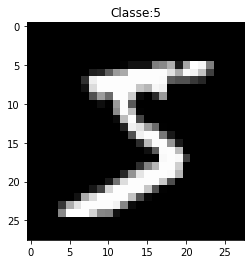

In [219]:
plt.imshow(X_treinamento[0], cmap='gray')
plt.title('Classe:' + str(y_treinamento[0]))

In [220]:
X_treinamento.shape

(60000, 28, 28)

In [221]:
28*28

784

In [222]:
X_treinamento = X_treinamento.reshape(60000, 28*28)
X_treinamento.shape

(60000, 784)

In [223]:
X_treinamento[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [224]:
X_treinamento[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [225]:
X_teste.shape

(10000, 28, 28)

In [226]:
X_teste = X_teste.reshape(10000, 28*28)
X_teste.shape

(10000, 784)

In [227]:
y_treinamento, y_teste

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

# Pré-processamento

In [228]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [229]:
X_treinamento[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [230]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [231]:
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [232]:
X_treinamento.shape

(60000, 784)

In [233]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [234]:
# Sigmoide - 0 e 1 (2 classes)
# Softmax - (3 ou mais classes)

In [235]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [236]:
y_treinamento = np_utils.to_categorical(y_treinamento)

In [237]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [238]:
y_treinamento[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [239]:
y_treinamento[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [240]:
y_treinamento[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [241]:
y_treinamento[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [242]:
y_teste = np_utils.to_categorical(y_teste)
y_teste

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Arquitetura e treinamento da RNA

In [243]:
# Camadas ocultas
# Para problemas não complexos usar duas camadas
# Para problemas maiores, usar aumentar o número de camadas
(784+10)/2

397.0

In [244]:
#784 -> 397 -> 397 -> 10 neuronios
rna_neural =Sequential()
rna_neural.add(Dense(input_shape = (784, ), units = 397, activation = 'relu'))
rna_neural.add(Dense(units = 397, activation='relu'))
rna_neural.add(Dense(units=10, activation='softmax'))

In [245]:
rna_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [246]:
historico = rna_neural.fit(X_treinamento, y_treinamento, batch_size = 128, epochs = 50)

Epoch 1/50
469/469 [==============================] - 5s 9ms/step - loss: 0.2285 - accuracy: 0.9340
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0863 - accuracy: 0.9733
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0546 - accuracy: 0.9829
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0394 - accuracy: 0.9875
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0300 - accuracy: 0.9906
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0219 - accuracy: 0.9926
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0160 - accuracy: 0.9947
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0155 - accuracy: 0.9947
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0144 - accuracy: 0.9952

# Avaliação

In [247]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

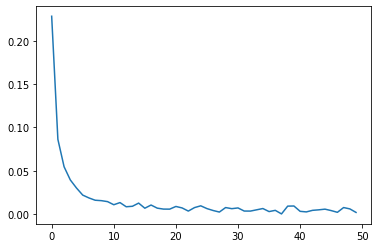

In [248]:
plt.plot(historico.history['loss']);

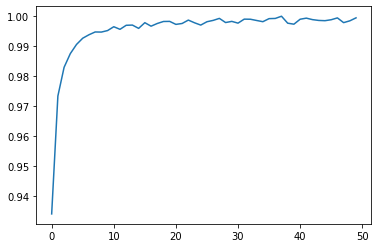

In [249]:
plt.plot(historico.history['accuracy']);

In [250]:
X_teste, X_teste.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), (10000, 784))

In [251]:
rna_neural.evaluate(X_teste, y_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.1271 - accuracy: 0.9832


[0.12711729109287262, 0.9832000136375427]

In [252]:
previsoes = rna_neural.predict(X_teste)
previsoes, previsoes.shape

(array([[1.1039986e-21, 2.3789133e-19, 1.7490083e-20, ..., 1.0000000e+00,
         5.9111787e-20, 1.8398278e-16],
        [7.0088373e-27, 6.8952986e-22, 1.0000000e+00, ..., 8.7820613e-36,
         2.1256456e-27, 0.0000000e+00],
        [3.7302021e-17, 1.0000000e+00, 1.5510854e-12, ..., 1.6959672e-12,
         8.5502707e-09, 3.1722095e-19],
        ...,
        [0.0000000e+00, 6.7235928e-26, 2.3106977e-33, ..., 2.4246192e-28,
         1.1587628e-25, 1.7875426e-21],
        [6.9638522e-34, 3.2229989e-35, 0.0000000e+00, ..., 2.0628811e-27,
         1.2257414e-20, 0.0000000e+00],
        [1.3608535e-32, 2.3153314e-32, 1.2922374e-36, ..., 0.0000000e+00,
         6.7827292e-29, 0.0000000e+00]], dtype=float32), (10000, 10))

In [253]:
previsoes[0]

array([1.1039986e-21, 2.3789133e-19, 1.7490083e-20, 5.2278205e-17,
       6.1056637e-20, 1.3494785e-20, 1.1739653e-26, 1.0000000e+00,
       5.9111787e-20, 1.8398278e-16], dtype=float32)

In [254]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [255]:
import numpy as np
np.argmax(y_teste[0])

7

# Classificação de uma única imagem

In [292]:
import cv2
from google.colab.patches import cv2_imshow

In [293]:
img_teste = cv2.imread('/content/digito.png')

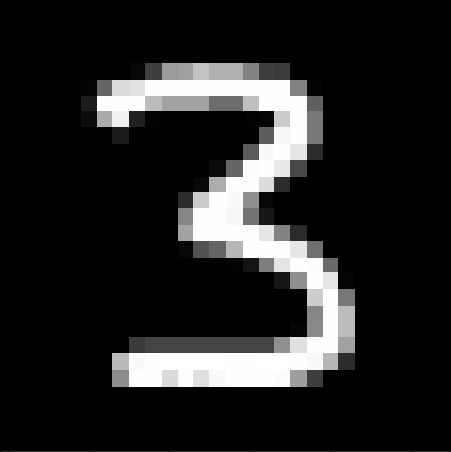

In [294]:
cv2_imshow(img_teste)

In [267]:
img_teste.shape

(452, 451, 3)

In [297]:
img_teste = cv2.resize(img_teste, (28,28))
img_teste.shape

(28, 28, 3)

In [306]:
cv2_imshow(img_teste)

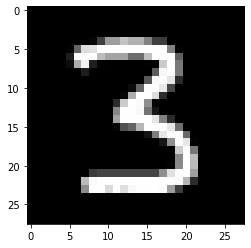

In [307]:
plt.imshow(img_teste);

In [308]:
img_teste = cv2.cvtColor(img_teste, cv2.COLOR_BGR2GRAY)
img_teste.shape

(28, 28)

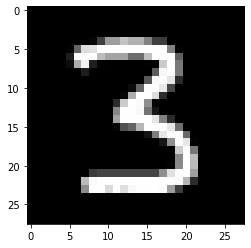

In [309]:
plt.imshow(img_teste,cmap = 'gray');

In [310]:
img_teste = img_teste.reshape(1, 28*28)
img_teste.shape

(1, 784)

In [274]:
img_teste

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   6,  63, 156, 159, 195, 177, 177, 130,  63,  60,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   4, 101, 220, 225, 254, 254, 254, 254, 254, 254, 254,
        254, 253, 130,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  29, 254, 254, 254, 188

In [276]:
img_teste = img_teste / 255
img_teste

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [311]:
previsao = rna_neural.predict(img_teste)

In [312]:
previsao

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [313]:
np.argmax(previsao)

3